# **Tutorial - App Combustível**
---

## Pré-requisitos da aula

- Funções
- Import
- Orientação a Objetos
- Interface Gráfica
- Introdução ao Flet
- Meu primeiro Flet App
- Eventos
- Light e Dark Mode

---

Nas aulas anteriores, criamos alguns apps com a finalidade de apenas testar alguns recursos. A partir de agora, todos os apps que iremos criar podem ser perfeitamente aplicáveis no dia-a-dia do usuário. Finalmente chegamos à fase em que iremos desenvolver nossos apps completos para você poder publicar à vontade e mostrar para os amigos com um aplicativo para chamar de seu.

Nosso primeiro app completo será um app de combustível.

## Situação-problema
---

Imagine que o nosso cliente possua um carro flex, ou seja, aceita como combustível tanto **gasolina** como **etanol**. Não é segredo que o etanol é bem mais barato do que a gasolina. O que muitos podem não saber é que o consumo do etanol também é muito maior. O cliente sabe disso, e gostaria de ter no seu celular um app, ou pelo menos uma aplicação online que pudesse retornar qual combustível tem o melhor custo-benefício com base no preço dos dois.

## Solução
---

### Começando a criar o app

Nosso cliente não exigiu que o nosso aplicativo fosse especificamente web ou app para celular. Pediu apenas que fosse um dos dois, mas como o Flet permite que desenvolvamos para qualquer plataforma usando o mesmo código-fonte, não há trabalho algum desenvolver simultâneamente para os dois. É o que faremos:

1. Começe criando o projeto. Faça o nosso ritual padrão de criar a pasta do projeto (nome usado nesse tutorial: "**combustivel**"). Não se esqueça de criar o ambiente virtual `.venv`, instalar o Flet (`pip install flet`) e criar um novo projeto flet dentro da pasta (`flet create .`).
2. Nosso código-fonte inicial se parecerá com esse:

In [ ]:
import flet as ft

def main(page: ft.Page):
    page.add(ft.SafeArea(ft.Text("Hello, Flet!")))

ft.app(main)

3. Acresccente as prorpiedades que desejar:

In [ ]:
import flet as ft

def main(page: ft.Page):
    # propriedades da página
    page.title = "Combustível"
    page.scroll = "adaptive"
    page.theme_mode = ft.ThemeMode.LIGHT
    page.bgcolor = ft.colors.WHITE

    page.add(ft.SafeArea(ft.Text("Hello, Flet!")))

ft.app(main)

### AppBar

4. Vamos começar com o **AppBar**. O AppBar é uma barra superior da nossa aplicação que será inserida antes de `page.add()`:

In [ ]:
import flet as ft

def main(page: ft.Page):
    page.title = "Combustível"
    page.scroll = "adaptive"
    page.theme_mode = ft.ThemeMode.LIGHT
    page.bgcolor = ft.colors.WHITE

    # AppBar
    page.appbar = ft.AppBar()

    page.add(ft.SafeArea(ft.Text("Hello, Flet!")))

ft.app(main)

5. Isso já é o suficiente para gerar um AppBar, embora sem conteúdo. Veja o resultado na versão desktop, mas procure executar também na versão web e mobile:

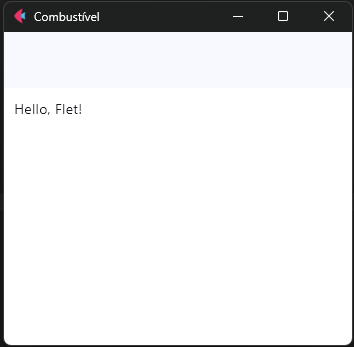

6. Vamos começar colocando um título para o nosso AppBar:

In [ ]:
import flet as ft

def main(page: ft.Page):
    page.title = "Combustível"
    page.scroll = "adaptive"
    page.theme_mode = ft.ThemeMode.LIGHT
    page.bgcolor = ft.colors.WHITE

    # AppBar
    page.appbar = ft.AppBar(title=ft.Text("Combustível", size=16))

    page.add(ft.SafeArea(ft.Text("Hello, Flet!")))

ft.app(main)

### Botão para alterar o tema

7. Aproveitaremos que criamos na aula passada um algoritmo para alternar os temas Light e Dark. Vamos implementar esse código dentro do AppBar, com uma alteração: iremos trocar o texto "**Light theme**" e "**Dark theme**" do app da aula anterior por ícones representando os temas. Para isso, iremos criar uma variável representando o ícone do tema padrão da aplicação (que é o tema claro).
8. Depois, iremos programar uma condicional para essa variável para que o ícone mude quando o *switch button* for acionado.
9. Enfim, chamaremos essa variável desta vez dentro do **AppBar** ao invés do SafeBar, acrescentando ao final de `ft.AppBar()` o parâmetro `actions=[tema, interruptor]`, onde `tema` representa o ícone do tema, e `interruptor` representa o *switch button*:

In [ ]:
import flet as ft

def main(page: ft.Page):
    # função do tema
    def mudar_tema(e):
        page.theme_mode = (
            ft.ThemeMode.DARK
            if page.theme_mode == ft.ThemeMode.LIGHT
            else ft.ThemeMode.LIGHT
        )
        page.bgcolor = (
            ft.colors.WHITE
            if page.theme_mode == ft.ThemeMode.LIGHT
            else ft.colors.GREY_900
        )
        # altera o ícone do tema
        tema.name = (
            ft.icons.SUNNY
            if page.theme_mode == ft.ThemeMode.LIGHT
            else ft.icons.MODE_NIGHT
        )
        page.update()

    page.title = "Combustível"
    page.scroll = "adaptive"
    page.theme_mode = ft.ThemeMode.LIGHT
    page.bgcolor = ft.colors.WHITE

    # ícone e botão do tema
    tema = ft.Icon(name=ft.icons.SUNNY)
    interruptor = ft.Switch(on_change=mudar_tema)

    # AppBar
    page.appbar = ft.AppBar(title=ft.Text("Combustível", size=16), actions=[tema, interruptor])

    page.add(ft.SafeArea(ft.Text("Hello, Flet!")))

ft.app(main)

10. Vamos ver como o nosso app está ficando. Para fins práticos, será mostrado abaixo apenas a tela do app no Desktop, mas procure executar também o seu app nas versões Web e Mobile:

#### Light Mode:

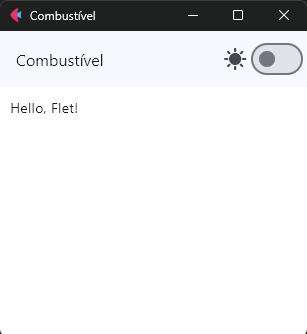

#### Dark Mode:

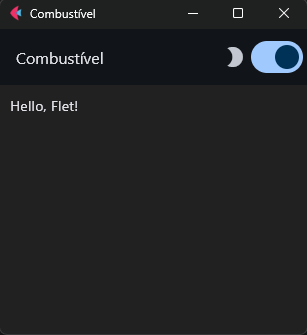

11. Legal! Agora, vamos começar a construção do app em si.

### Adicionando controles de página e manipulando eventos

12. Para o nosso app, precisaremos desses controles:

- `Text`: exibe o resultado na tela.
- `TextField`: controle de entrada usado para receber os valores dos combustíveis.
- `ElevatedButton`: Botão "Calcular" enviará os valores para a função, que retornará o resultado.
- `Row`: um container para exibir TextField e ElevatedButton horizontalmente.

13. Vamos substituir o conteúdo do `ft.Text()`dentro de `ft.SafeArea()` por um texto que funcionará como um título na página do App:

In [ ]:
import flet as ft

def main(page: ft.Page):
    def mudar_tema(e):
        page.theme_mode = (
            ft.ThemeMode.DARK
            if page.theme_mode == ft.ThemeMode.LIGHT
            else ft.ThemeMode.LIGHT
        )
        page.bgcolor = (
            ft.colors.WHITE
            if page.theme_mode == ft.ThemeMode.LIGHT
            else ft.colors.GREY_900
        )
        tema.name = (
            ft.icons.SUNNY
            if page.theme_mode == ft.ThemeMode.LIGHT
            else ft.icons.MODE_NIGHT
        )
        page.update()

    page.title = "Combustível"
    page.scroll = "adaptive"
    page.theme_mode = ft.ThemeMode.LIGHT
    page.bgcolor = ft.colors.WHITE

    tema = ft.Icon(name=ft.icons.SUNNY)
    interruptor = ft.Switch(on_change=mudar_tema)

    page.appbar = ft.AppBar(title=ft.Text("Combustível", size=16), actions=[tema, interruptor])

    page.add(
        ft.SafeArea(
            ft.Row(
                [ft.Text("\nCusto-benefício combustível", size=25, weight="bold")],
                alignment=ft.MainAxisAlignment.CENTER
            )
        )
    )

ft.app(main)

14. Como estamos desenvolvendo para web e mobile, vamos executar nessas duas plataformas. Primeiro, vamos testar o modo claro e modo escuro na versão web, e depois vamos testar a versão web também em dispositivos móveis, para ver se a nossa página web está responsiva:

#### Web Desktop Light Mode:

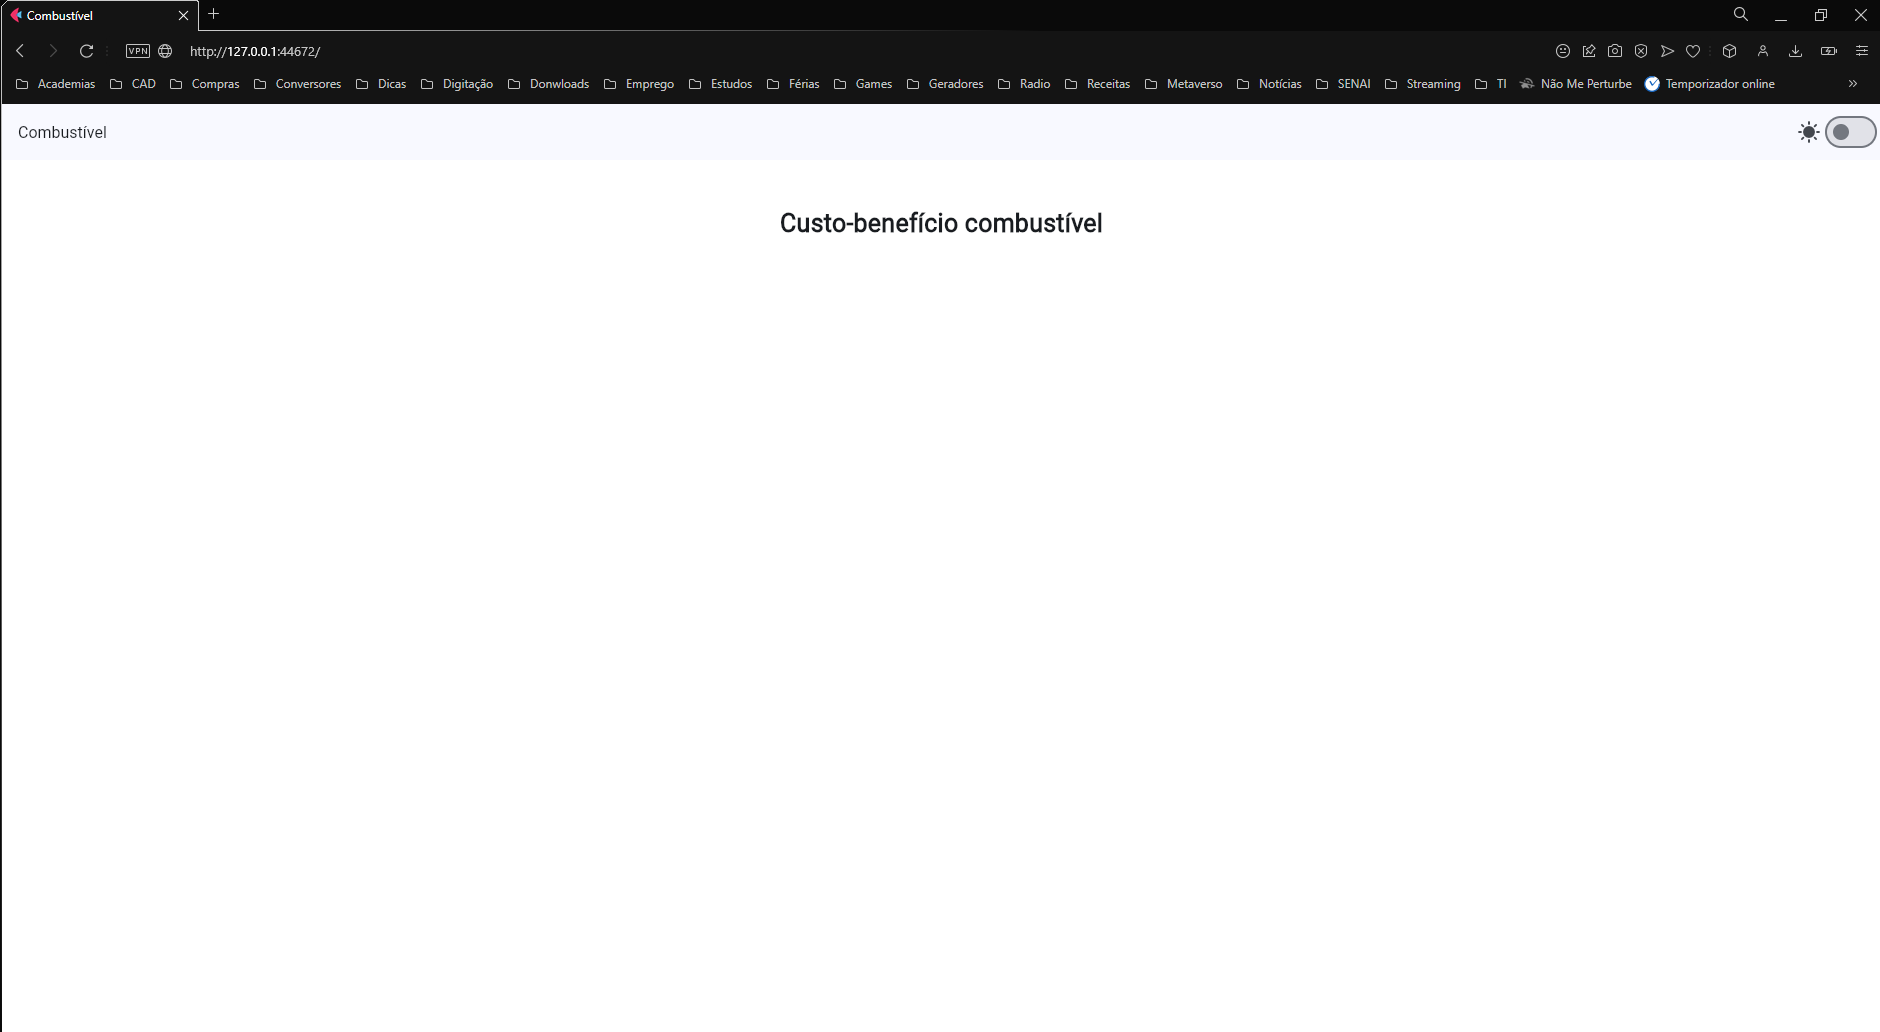

#### Web Desktop Dark Mode:

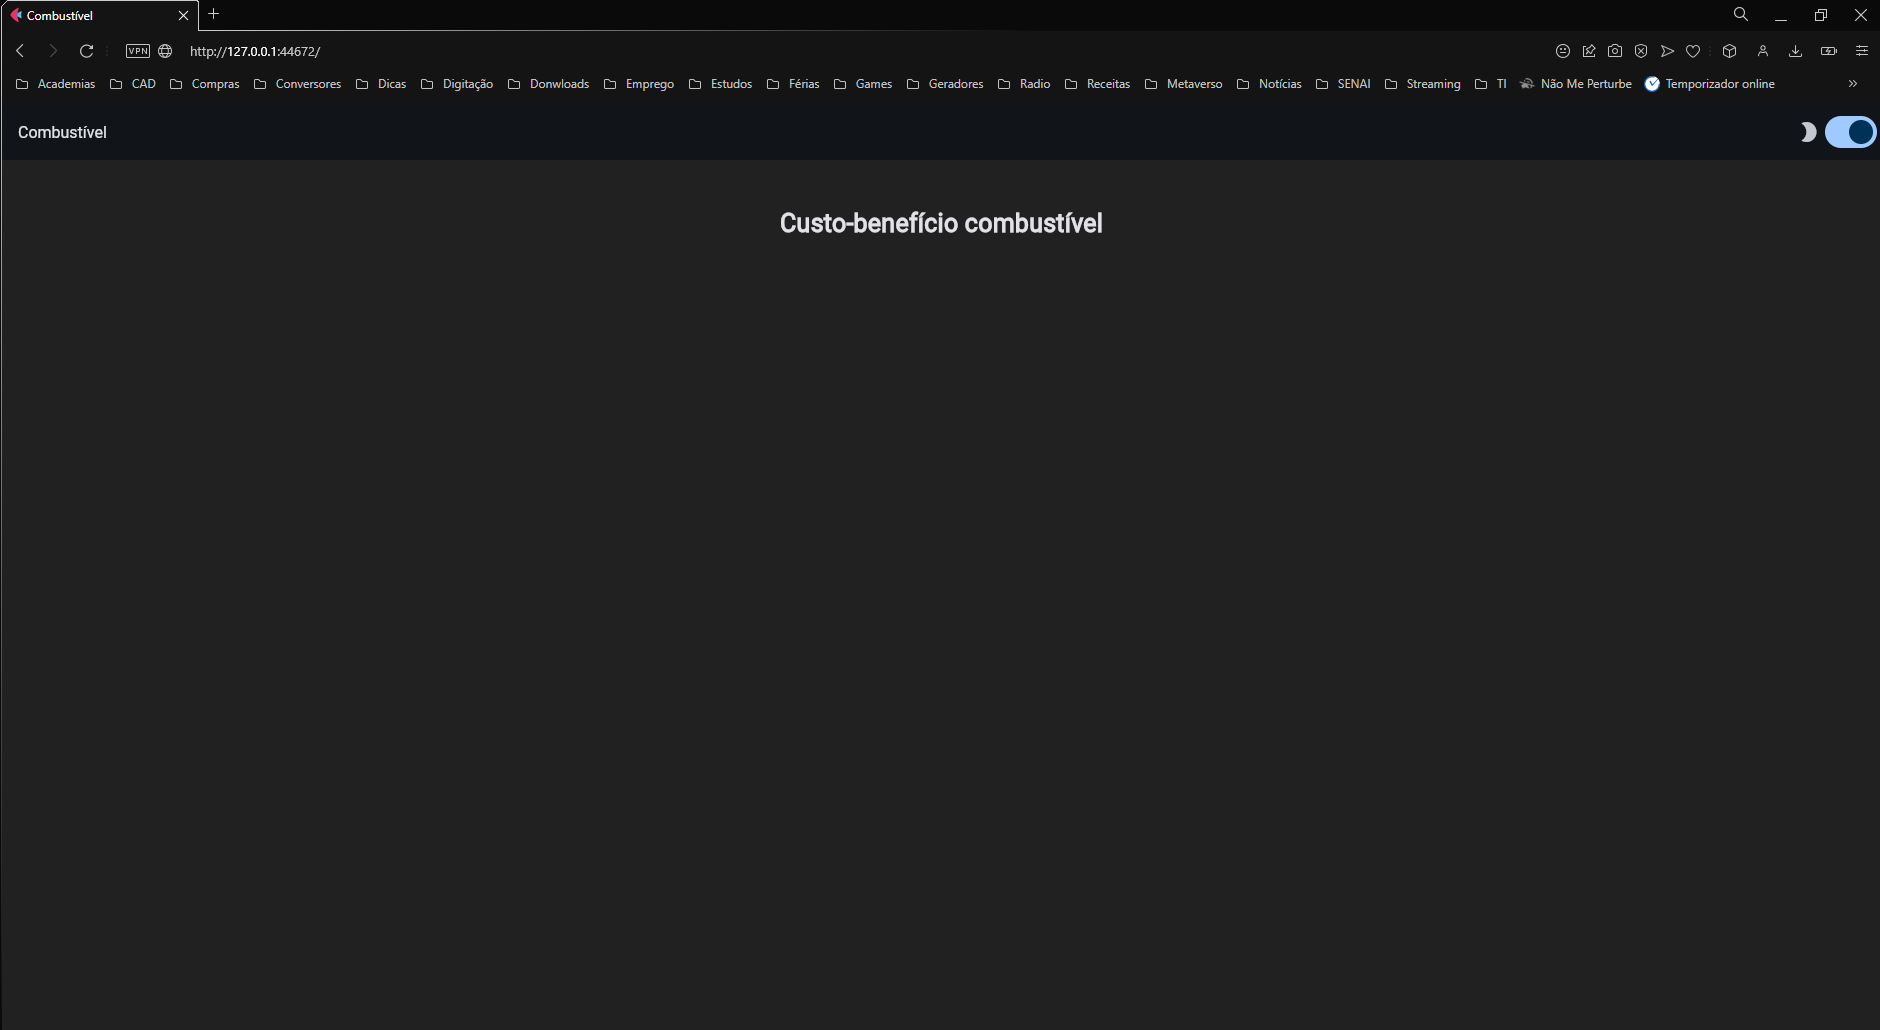

#### Web Mobile Portrait Light Mode:

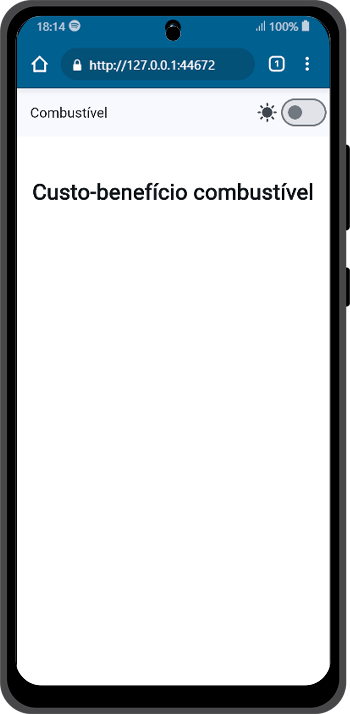
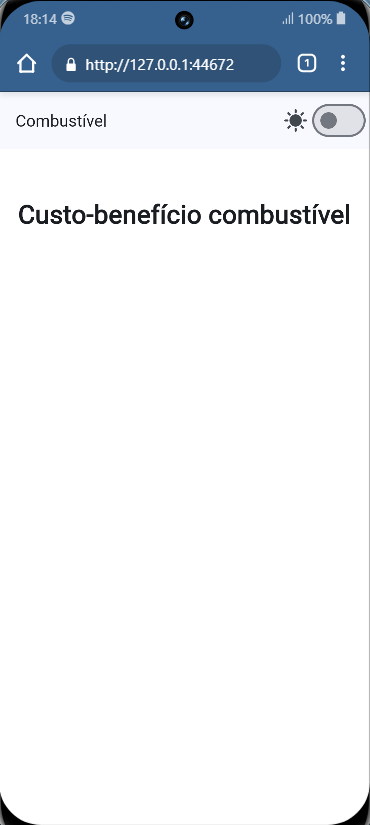

#### Web Mobile Portrait Dark Mode:

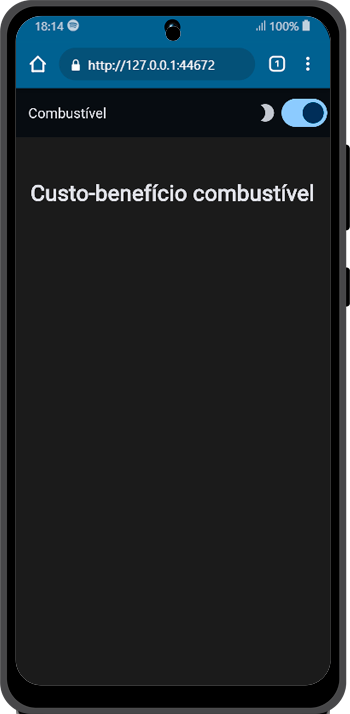
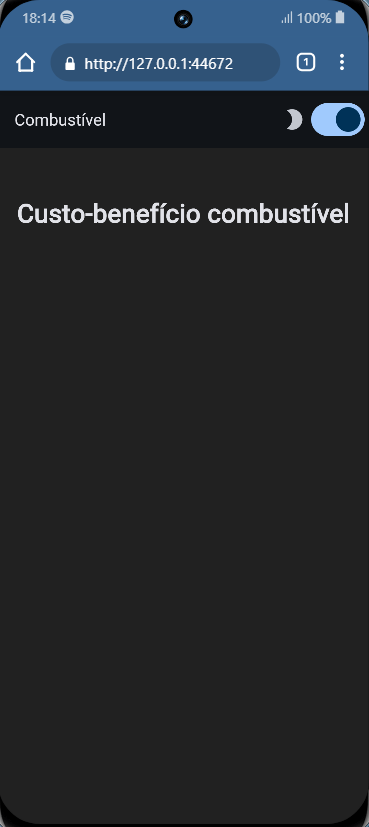

#### Web Mobile Landscape Light Mode:

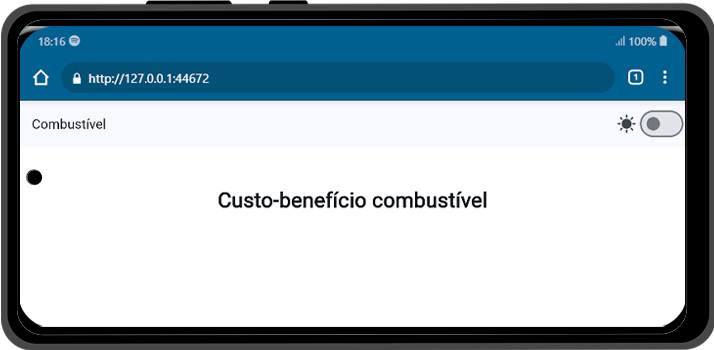
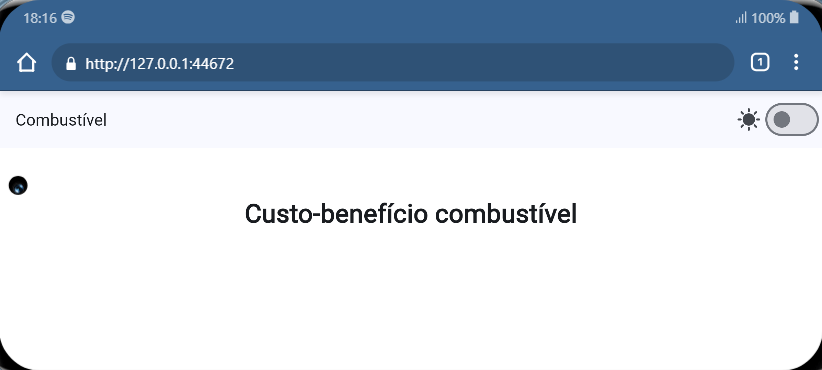

#### Web Mobile Landscape Dark Mode:

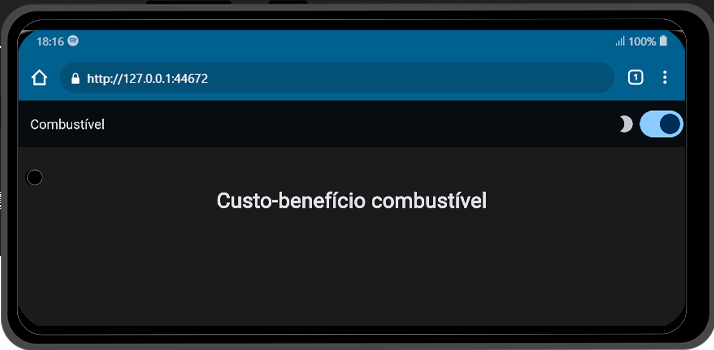
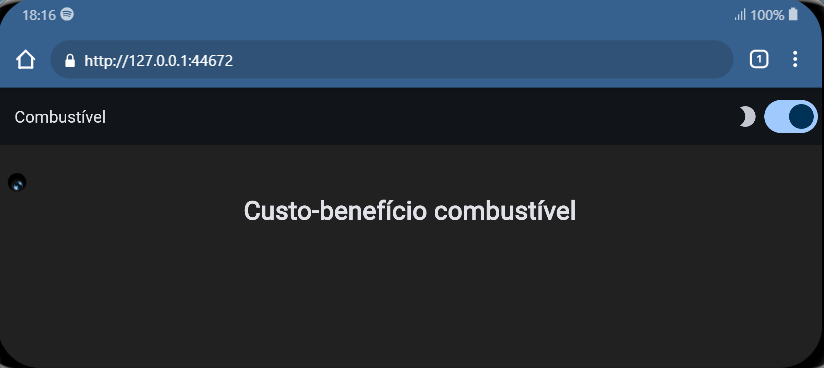

15. Agora, vamos testar o app mobile:

#### Portrait Light Mode:

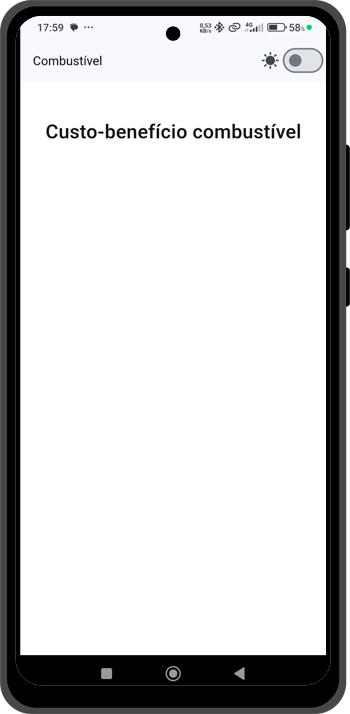
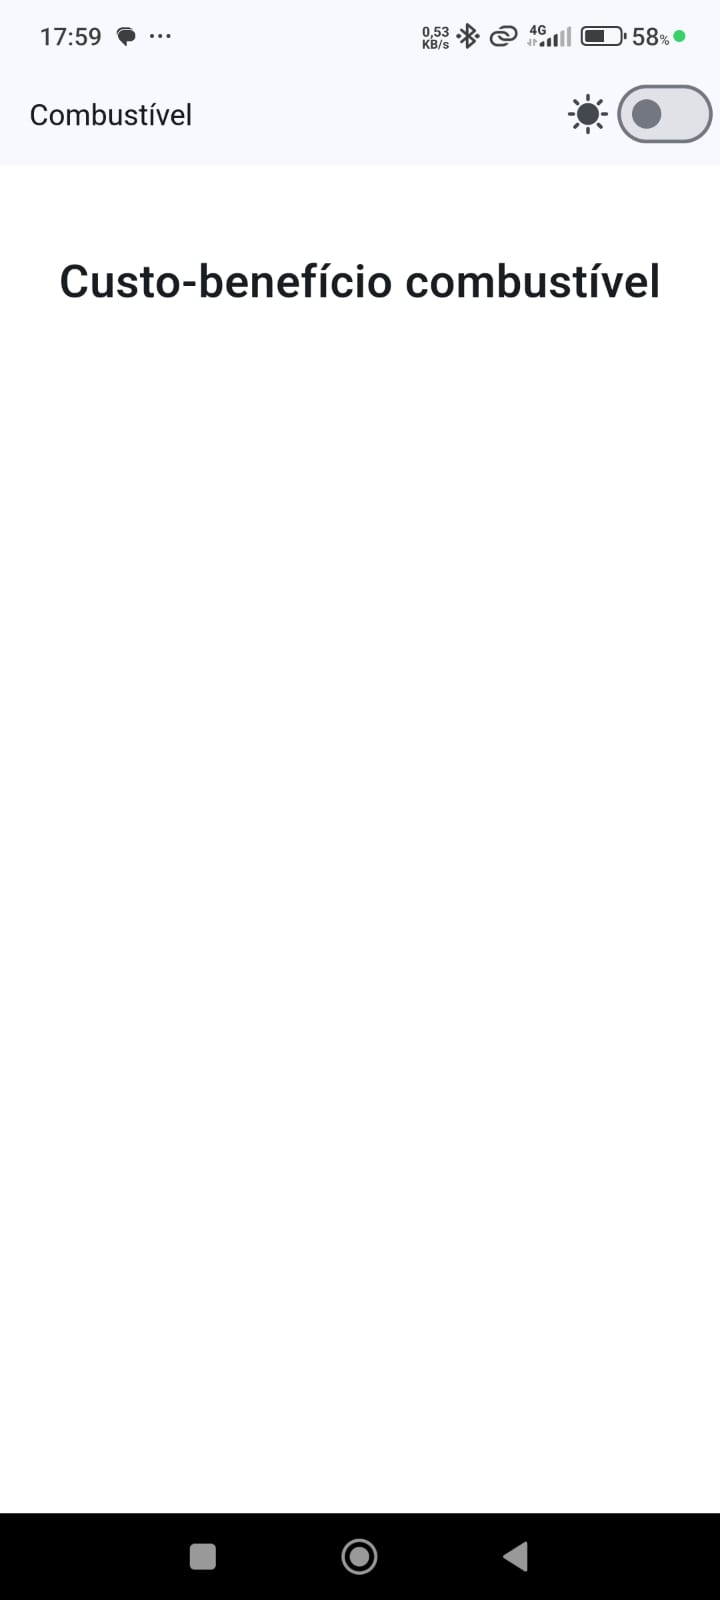

#### Portrait Dark Mode:

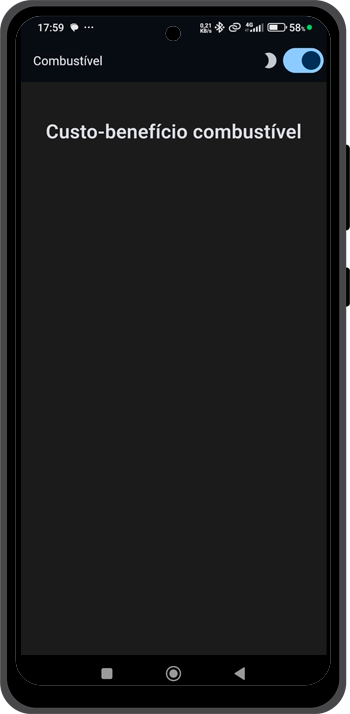
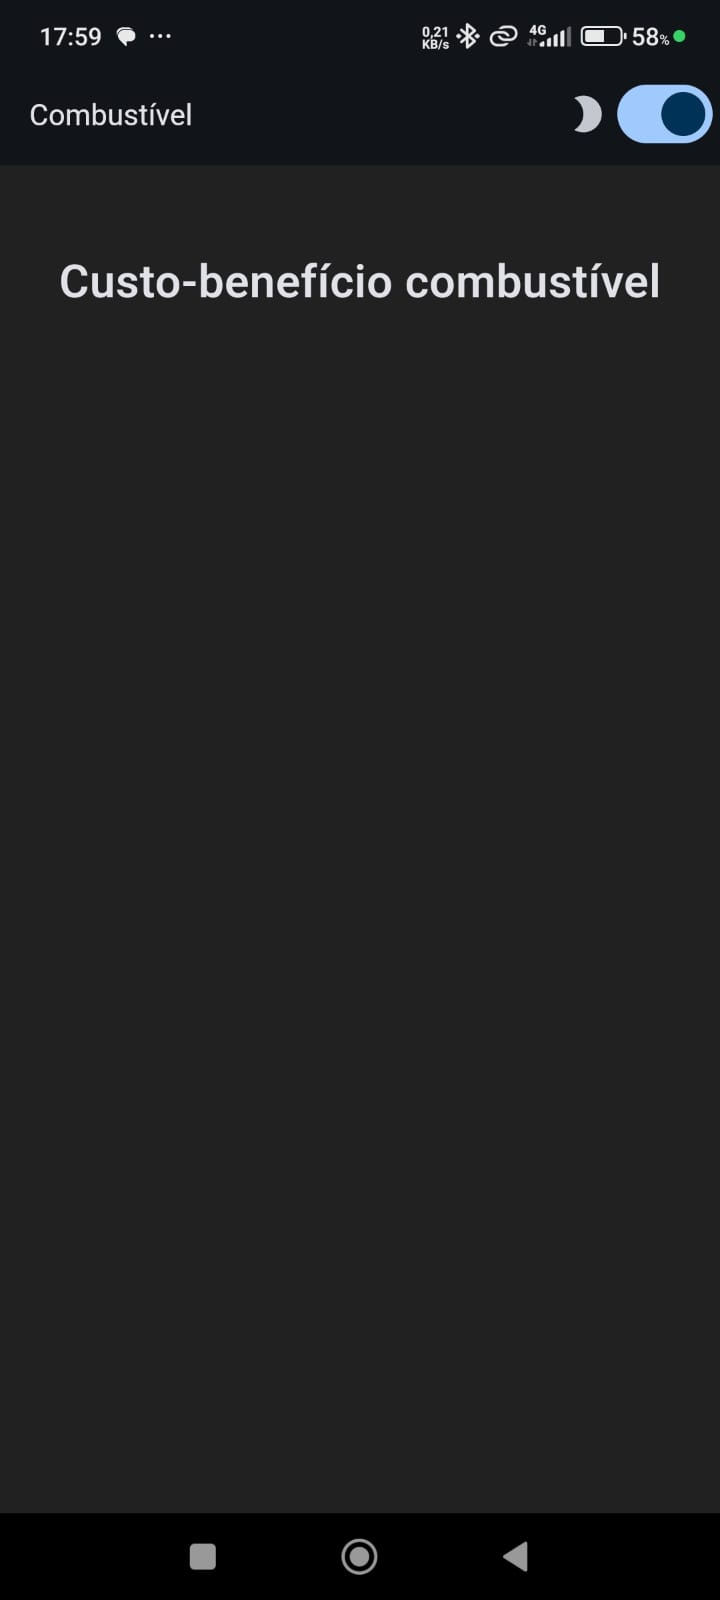

#### Landscape Light Mode:

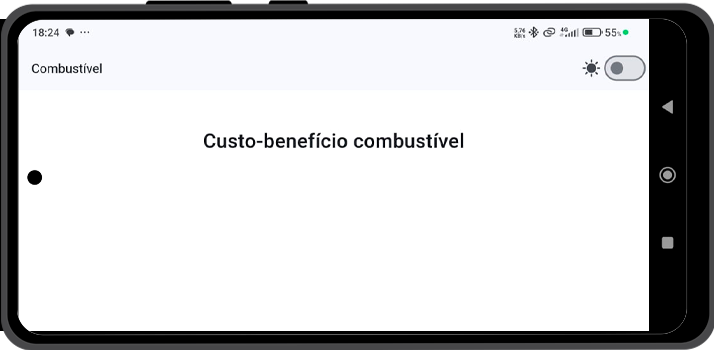
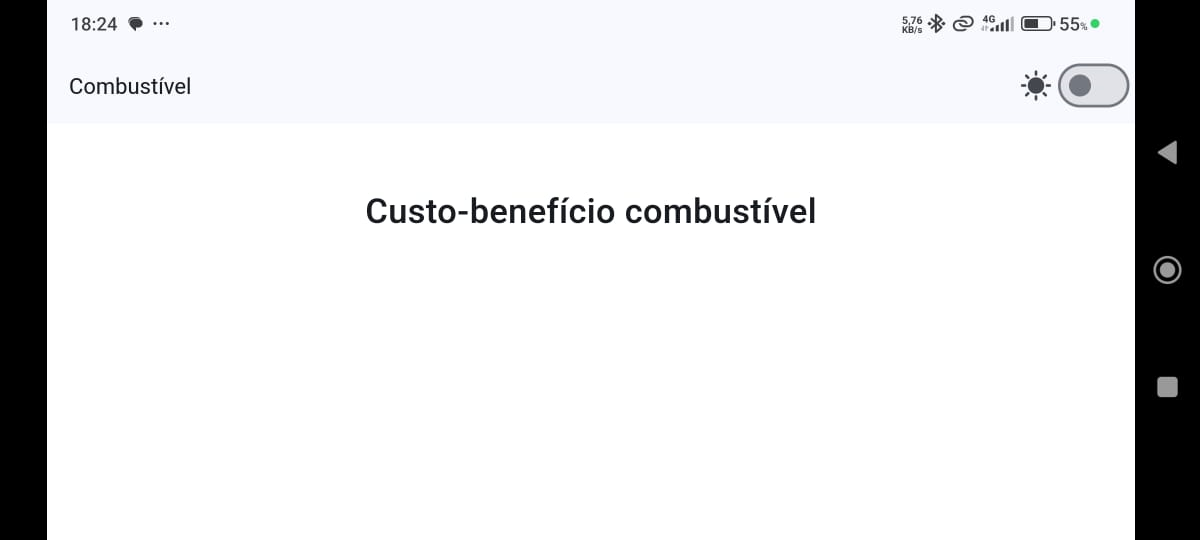

#### Landscape Dark Mode:

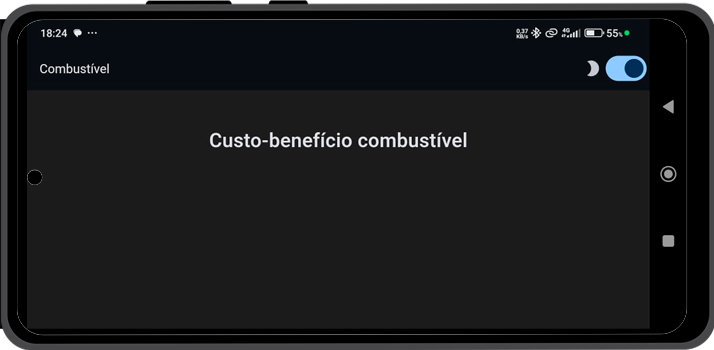
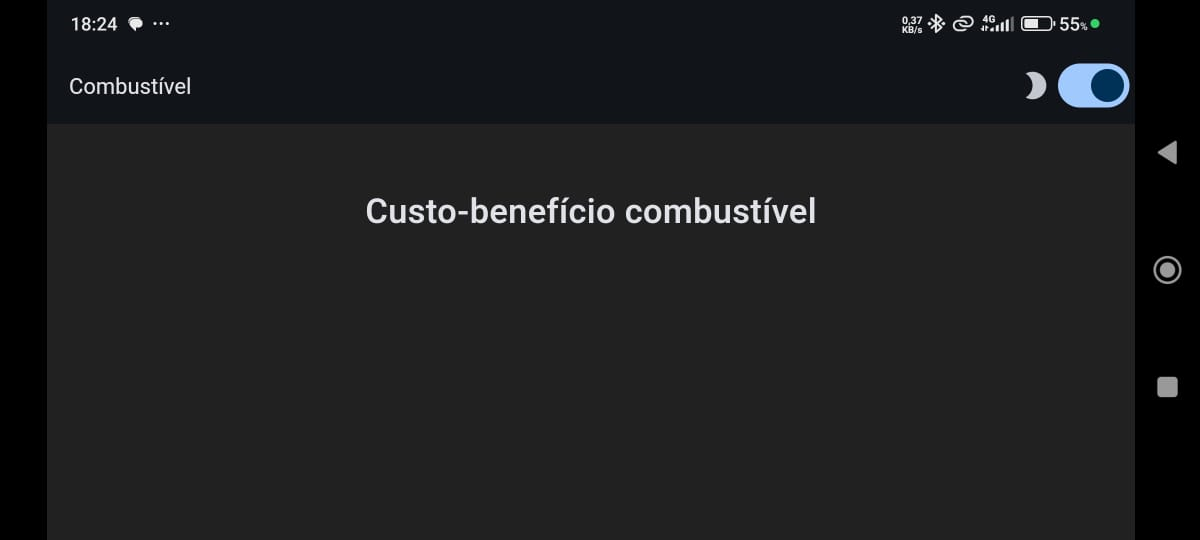

16. Agora vamos acrescentar os inputs do usuário. Criaremos duas variáveis que receberão um `ft.TextField()` cada: um para gasolina e outro para etanol:

In [ ]:
# variáveis do app
gasolina = ft.TextField(label="Valor da gasolina", prefix="R$")
etanol = ft.TextField(label="Valor da etanol", prefix="R$")

### Grid de 12 colunas

17. Agora vamos colocar esses elementos dentro da página. Para uma melhor usabilidade, queremos eles centralizados e responsivos. Para isso, iremos usar dois elementos: `ft.ResponsiveRow()`, e dentro dele iremos colocar um `ft.Container()` para cada controle que adicionarmos. Também garantiremos que o layout da página mude de acordo com a largura da tela, e para isso utilizaremos o sistema de **Grid de 12 colunas** para diagramar a página, de forma similar à grid do Front-End.
18. Funciona assim: imaginando a tela dividida em 12 colunas, iremos colocar cada `ft.TextField()` ocupando 6 colunas em dispositivos como tablets ou smartphones na posição paisagem, dessa forma ocupando metade da tela cada um. Em dispositivos maiores, os inputs irão ocupar 4 colunas, e em telas gigantes, como as de uma SmarTV, 2 colunas. Em smartphones em posição retrato, cada input irá ocupar todas as 12 colunas. Segue o código do `page.add()`:

In [ ]:
page.add(
    ft.SafeArea(
        ft.Row(
            [ft.Text("\nCusto-benefício combustível\n", size=25, weight="bold")],
            alignment=ft.MainAxisAlignment.CENTER
        )
    ),
    ft.ResponsiveRow(
        [
            ft.Container(gasolina, col={"sm": 6, "md": 4, "xl": 2}),
            ft.Container(etanol, col={"sm": 6, "md": 4, "xl": 2})
        ],
        alignment=ft.MainAxisAlignment.CENTER
    )
)

19. O código-fonte total até esse momento da nossa aula deverá ficar assim:

In [ ]:
import flet as ft

def main(page: ft.Page):
    def mudar_tema(e):
        page.theme_mode = (
            ft.ThemeMode.DARK
            if page.theme_mode == ft.ThemeMode.LIGHT
            else ft.ThemeMode.LIGHT
        )
        page.bgcolor = (
            ft.colors.WHITE
            if page.theme_mode == ft.ThemeMode.LIGHT
            else ft.colors.GREY_900
        )
        tema.name = (
            ft.icons.SUNNY
            if page.theme_mode == ft.ThemeMode.LIGHT
            else ft.icons.MODE_NIGHT
        )
        page.update()

    page.title = "Combustível"
    page.scroll = "adaptive"
    page.theme_mode = ft.ThemeMode.LIGHT
    page.bgcolor = ft.colors.WHITE

    tema = ft.Icon(name=ft.icons.SUNNY)
    interruptor = ft.Switch(on_change=mudar_tema)
    gasolina = ft.TextField(label="Valor da gasolina", prefix_text="R$ ")
    etanol = ft.TextField(label="Valor da etanol", prefix_text="R$ ")

    page.appbar = ft.AppBar(title=ft.Text("Combustível", size=16), actions=[tema, interruptor])

    page.add(
        ft.SafeArea(
            ft.Row(
                [ft.Text("\nCusto-benefício combustível\n", size=25, weight="bold")],
                alignment=ft.MainAxisAlignment.CENTER
            )
        ),
        ft.ResponsiveRow(
            [
                ft.Container(gasolina, col={"sm": 6, "md": 4, "xl": 2}),
                ft.Container(etanol, col={"sm": 6, "md": 4, "xl": 2})
            ],
            alignment=ft.MainAxisAlignment.CENTER
        )
    )

ft.app(main)

20. O resultado até o momento deverá ser esse:

#### Web

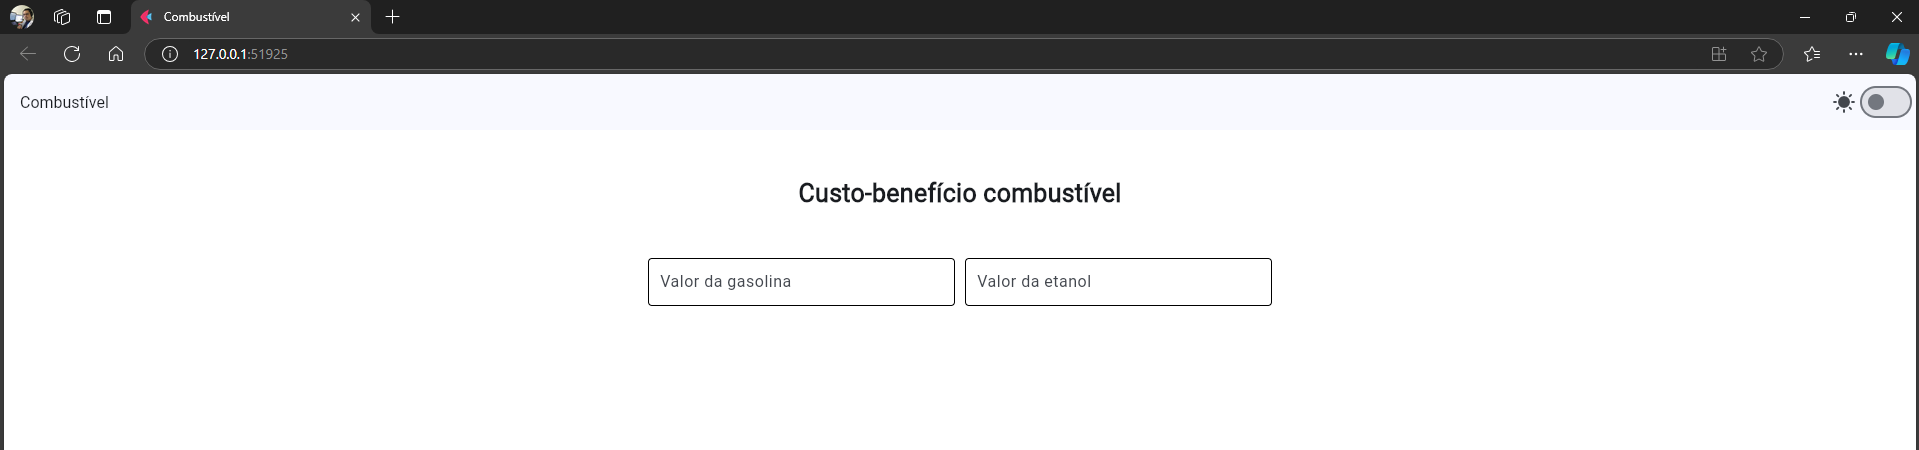

#### Mobile Portrait

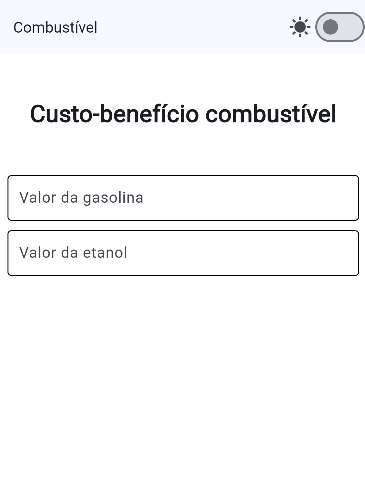

#### Mobile Landscape

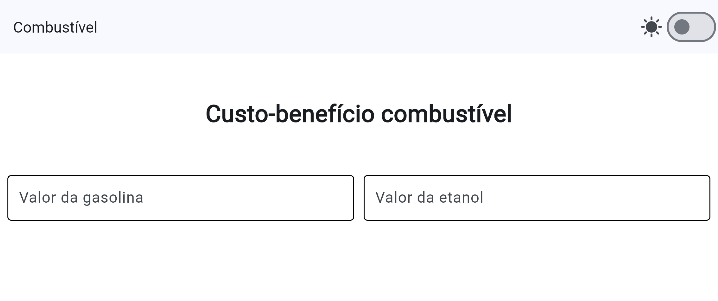

#### Inserindo valores nos inputs

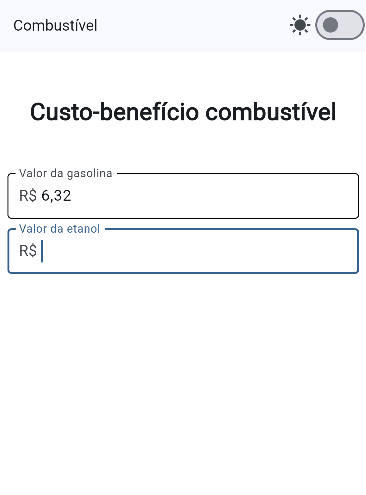

21. Repare que o `R$` é inserido automaticamente, graças à propriedade `sufix_text` que colocamos no `ft.TextField()`.
22. Vamos acrescentar agora a função responsável por fazer a verificação do combustível. Para isso, temos que saber como verificar qual combustível possui o melhor custo-benefício. O cálculo é o seguinte: para o etanol ser mais vantajoso, o preço dele precisa ser até 70% do valor da gasolina, no máximo. Acima disso, a gasolina é mais vantajosa.
23. O resutado deverá ser mostrado em uma caixa de diálogo, que terá um botão para fechá-la. O código-fonte da caixa de diálogo segue abaixo. Só acrescentar logo após as variáveis:

In [ ]:
dlg_modal = ft.AlertDialog(
    modal=True,
    title=ft.Text("Melhor combustível:"),
    content=ft.Text(size=20, weight="bold"),
    actions=[ft.TextButton("OK")],
    actions_alignment=ft.MainAxisAlignment.END
)

24. Não se preocupe com o evento do botão. Iremos adicioná-lo mais tarde.
25. Agora vamos criar a função que será executada quando pedirmos para fazer o cálculo. Nele, iremos trabalhar com a propriedade `error_text` para indicar que o campo não deve ficar vazio, e impedir que o programa faça o cálculo sem que todos os campos estejam preenchidos:

In [ ]:
def calcular_combustivel(e):
    if not gasolina.value:
        gasolina.error_text = "Gasolina não pode ficar vazio"
        page.update()
    else:
        gasolina.error_text = ""
        page.update()
    if not etanol.value:
        etanol.error_text = "Etanol não pode ficar vazio"
        page.update()
    else:
        etanol.error_text = ""

        gasolina.value = float(gasolina.value.replace(",", "."))
        etanol.value = float(etanol.value.replace(",", "."))

        resultado = "Gasolina" if etanol.value >= gasolina.value*0.7 else "Etanol"

        dlg_modal.content.value = resultado
        gasolina.value = ""
        etanol.value = ""

        page.open(dlg_modal)

        page.update()

26. Agora, acrescentaremos dentro de `page.add()`o botão que fará a mágica acontecer. Acrescente antes do `result`:

In [ ]:
page.add(
    ft.SafeArea(
        ft.Row(
            [ft.Text("\nCusto-benefício combustível\n", size=25, weight="bold")],
            alignment=ft.MainAxisAlignment.CENTER
        )
    ),
    ft.ResponsiveRow(
        [
            ft.Container(gasolina, col={"sm": 6, "md": 4, "xl": 2}),
            ft.Container(etanol, col={"sm": 6, "md": 4, "xl": 2})
        ],
        alignment=ft.MainAxisAlignment.CENTER
    ),
    # botão que mostra o resultado
    ft.Row(
        [
            ft.Container(
                ft.ElevatedButton("Verificar", on_click=calcular_combustivel),
                padding=30
            )
        ],
        alignment=ft.MainAxisAlignment.CENTER
    )
)

27. Acrescente também o evento `on_submit` em `etanol` para que a função seja executada quando o usuário apertar **Enter** ao terminar o formulário:

In [ ]:
etanol = ft.TextField(label="Valor da etanol", prefix_text="R$ ", on_submit=calcular_combustivel)

28. A aplicação está quase pronta! Falta apenas mais um detalhe: o ícone que irá enfeitar a nossa aplicação no **AppBar**.
29. Primeiramente, vamos salvar o ícone na pasta **assets** do seu projeto. Salve a imagem desejada com a extensão `.png` ou `.ico`:

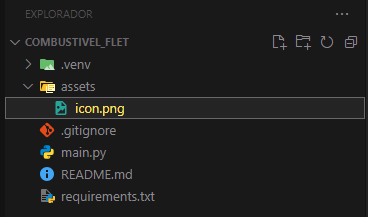

30. Depois, vamos alterar o código do `ft.AppBar()` para o código abaixo. Observe o nome do arquivo da imagem, pois deverá ser digitado exatamente como foi salvo:

In [ ]:
page.appbar = ft.AppBar(
    leading=ft.Image(src=f"/icon.png", fit=ft.ImageFit.CONTAIN),
    leading_width=48,
    title=ft.Text("Combustível", size=16),
    actions=[tema, interruptor]
)

31. E prontinho! Terminamos! O Código-fonte final deverá ser esse:

In [ ]:
import flet as ft

def main(page: ft.Page):
    def mudar_tema(e):
        page.theme_mode = (
            ft.ThemeMode.DARK
            if page.theme_mode == ft.ThemeMode.LIGHT
            else ft.ThemeMode.LIGHT
        )
        page.bgcolor = (
            ft.colors.WHITE
            if page.theme_mode == ft.ThemeMode.LIGHT
            else ft.colors.GREY_900
        )
        tema.name = (
            ft.icons.SUNNY
            if page.theme_mode == ft.ThemeMode.LIGHT
            else ft.icons.MODE_NIGHT
        )
        page.update()

    def calcular_combustivel(e):
        if not gasolina.value:
            gasolina.error_text = "Gasolina não pode ficar vazio"
            page.update()
        else:
            gasolina.error_text = ""
            page.update()

        if not etanol.value:
            etanol.error_text = "Etanol não pode ficar vazio"
            page.update()
        else:
            etanol.error_text = ""

            gasolina.value = float(gasolina.value.replace(",", "."))
            etanol.value = float(etanol.value.replace(",", "."))

            resultado = "Gasolina" if etanol.value >= gasolina.value*0.7 else "Etanol"

            dlg_modal.content.value = resultado
            gasolina.value = ""
            etanol.value = ""

            page.open(dlg_modal)

            page.update()

    page.title = "Combustível"
    page.scroll = "adaptive"
    page.theme_mode = ft.ThemeMode.LIGHT
    page.bgcolor = ft.colors.WHITE

    tema = ft.Icon(name=ft.icons.SUNNY)
    interruptor = ft.Switch(on_change=mudar_tema)
    gasolina = ft.TextField(label="Valor da gasolina", prefix_text="R$ ")
    etanol = ft.TextField(label="Valor da etanol", prefix_text="R$ ", on_submit=calcular_combustivel)

    dlg_modal = ft.AlertDialog(
        modal=True,
        title=ft.Text("Melhor combustível:"),
        content=ft.Text(size=20, weight="bold"),
        actions=[ft.TextButton("OK", on_click=lambda e: page.close(dlg_modal))],
        actions_alignment=ft.MainAxisAlignment.END
    )

    page.appbar = ft.AppBar(
        leading=ft.Image(src=f"/icon.png", fit=ft.ImageFit.CONTAIN),
        leading_width=48,
        title=ft.Text("Combustível", size=16),
        actions=[tema, interruptor]
    )

    page.add(
        ft.SafeArea(
            ft.Row(
                [ft.Text("\nCusto-benefício combustível\n", size=25, weight="bold")],
                alignment=ft.MainAxisAlignment.CENTER
            )
        ),
        ft.ResponsiveRow(
            [
                ft.Container(gasolina, col={"sm": 6, "md": 4, "xl": 2}),
                ft.Container(etanol, col={"sm": 6, "md": 4, "xl": 2})
            ],
            alignment=ft.MainAxisAlignment.CENTER
        ),
        ft.Row(
            [
                ft.Container(
                    ft.ElevatedButton("Verificar", on_click=calcular_combustivel),
                    padding=30
                )
            ],
            alignment=ft.MainAxisAlignment.CENTER
        )
    )

ft.app(main)

32. Para terminarmos, verifique o resultado final:

#### Web

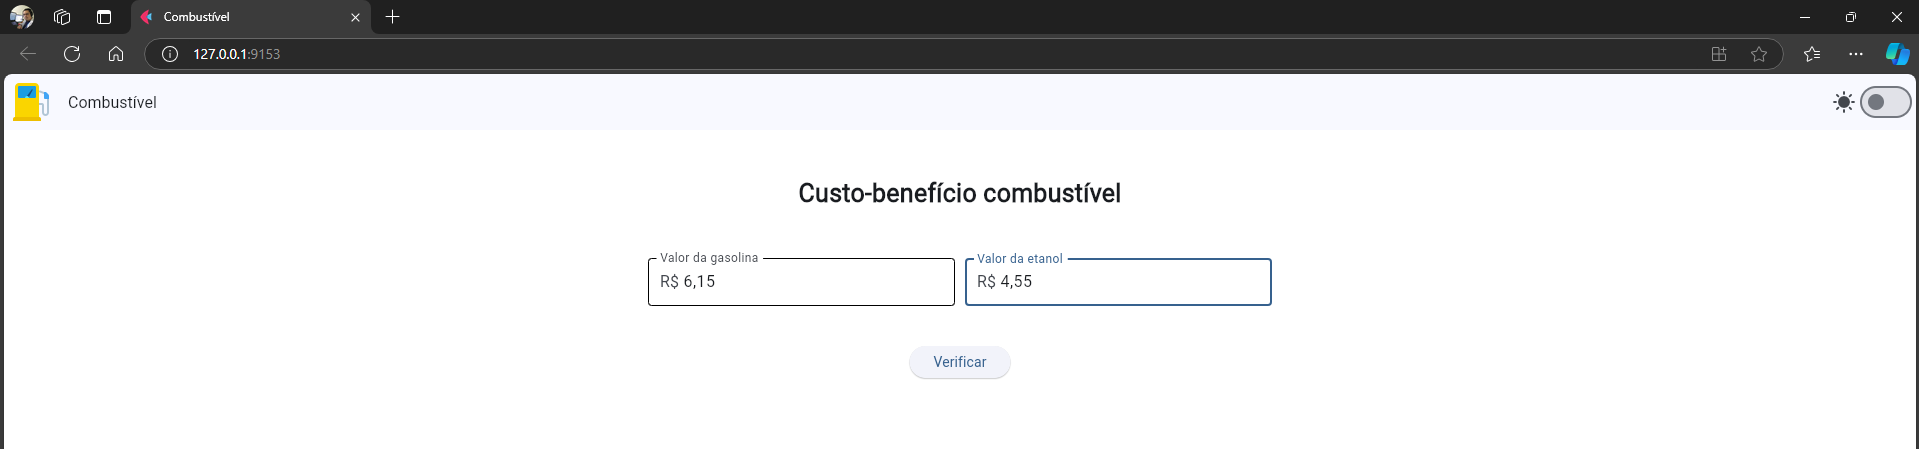
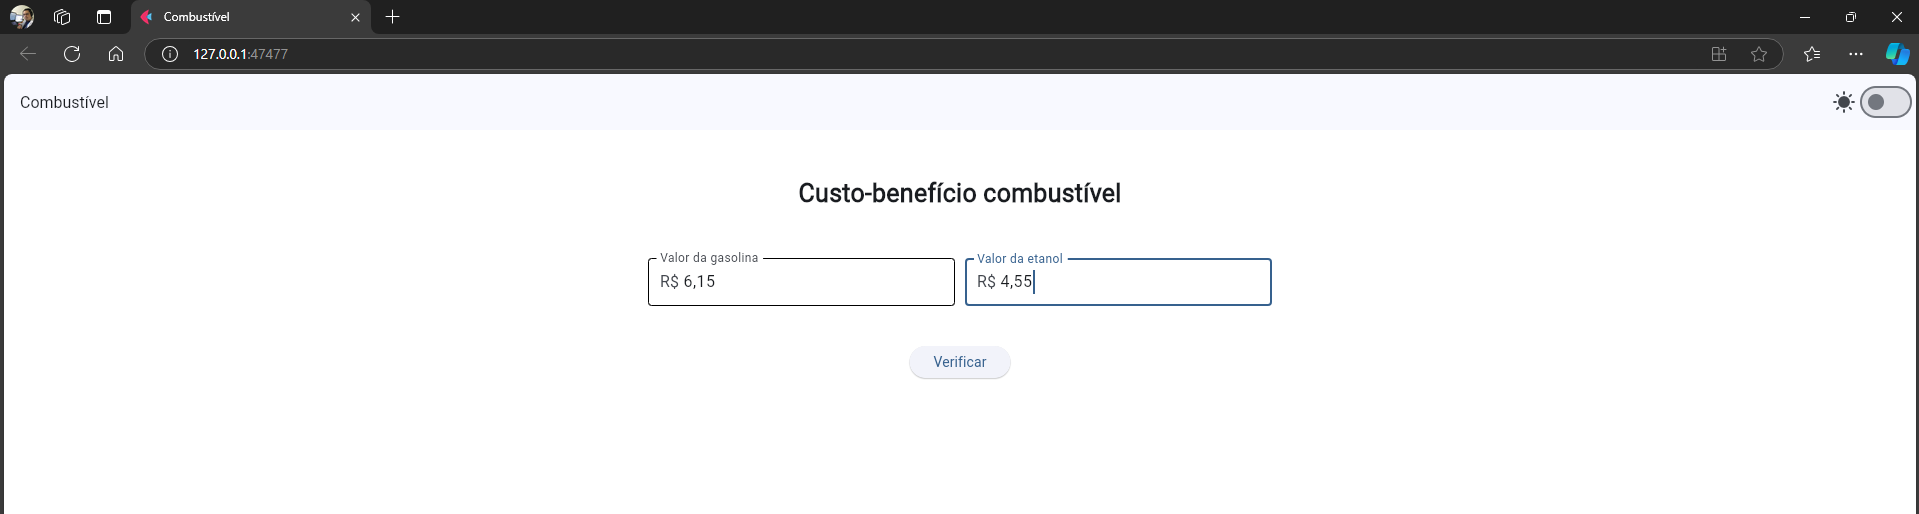

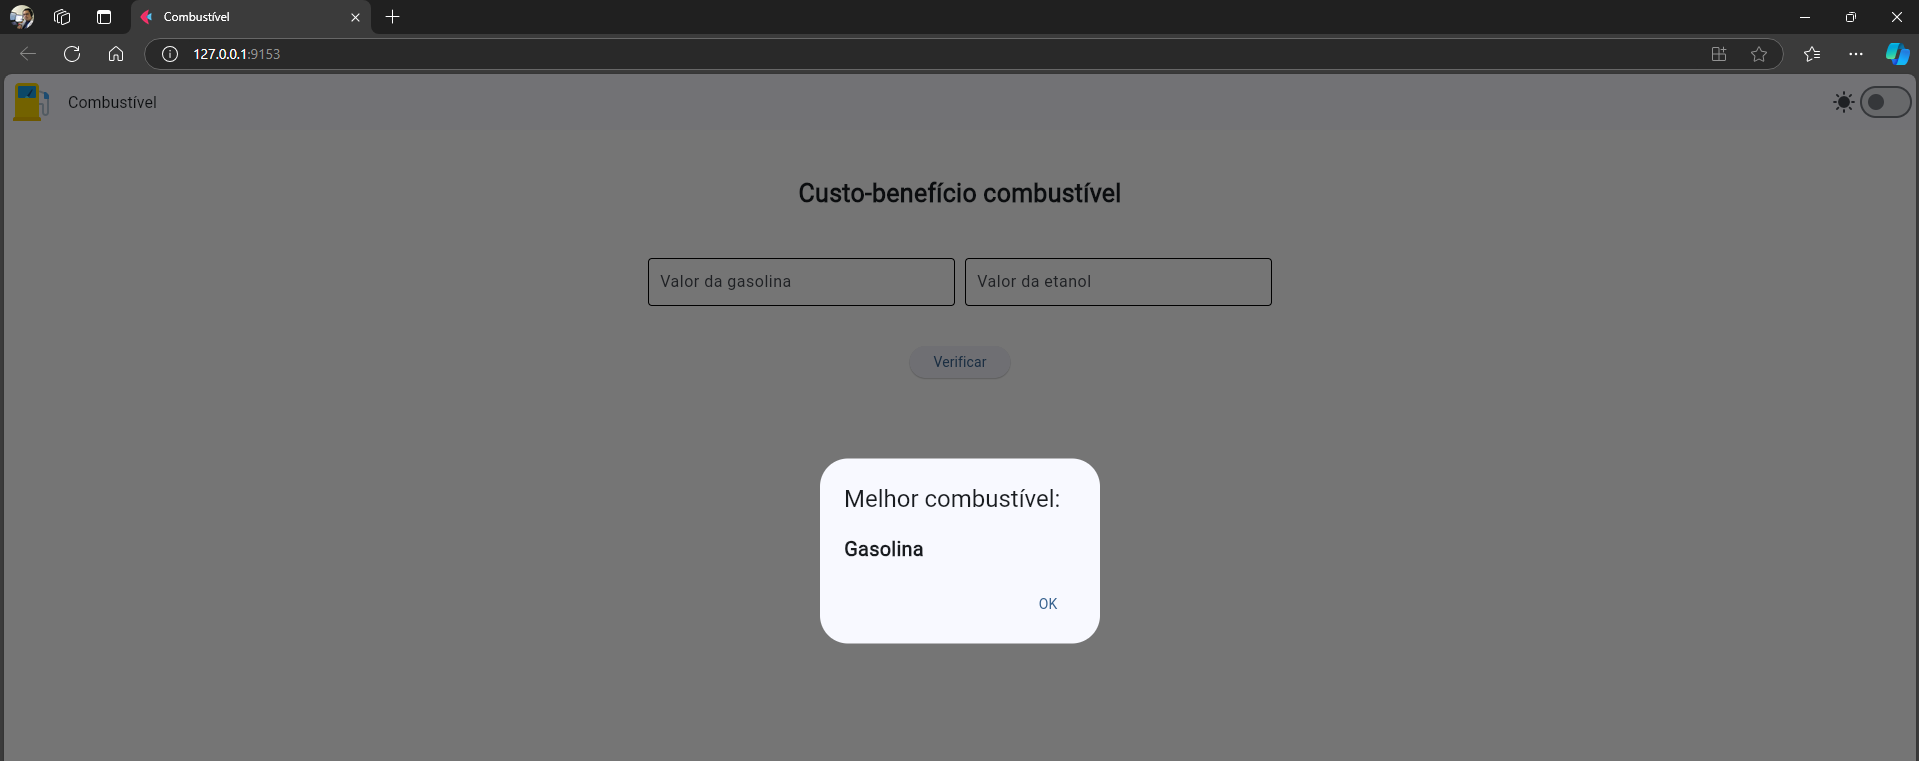
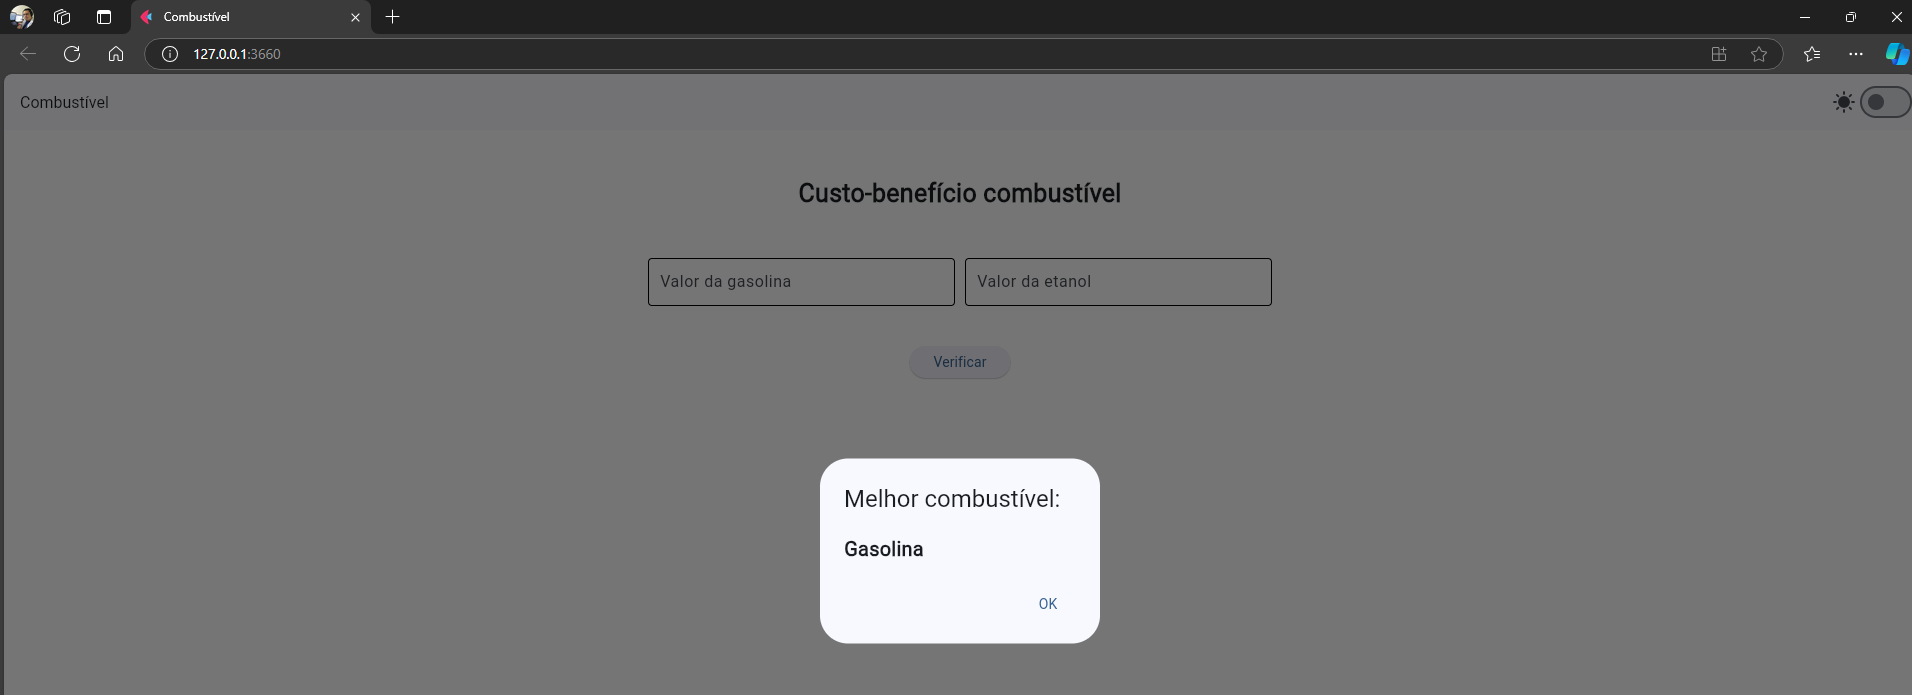
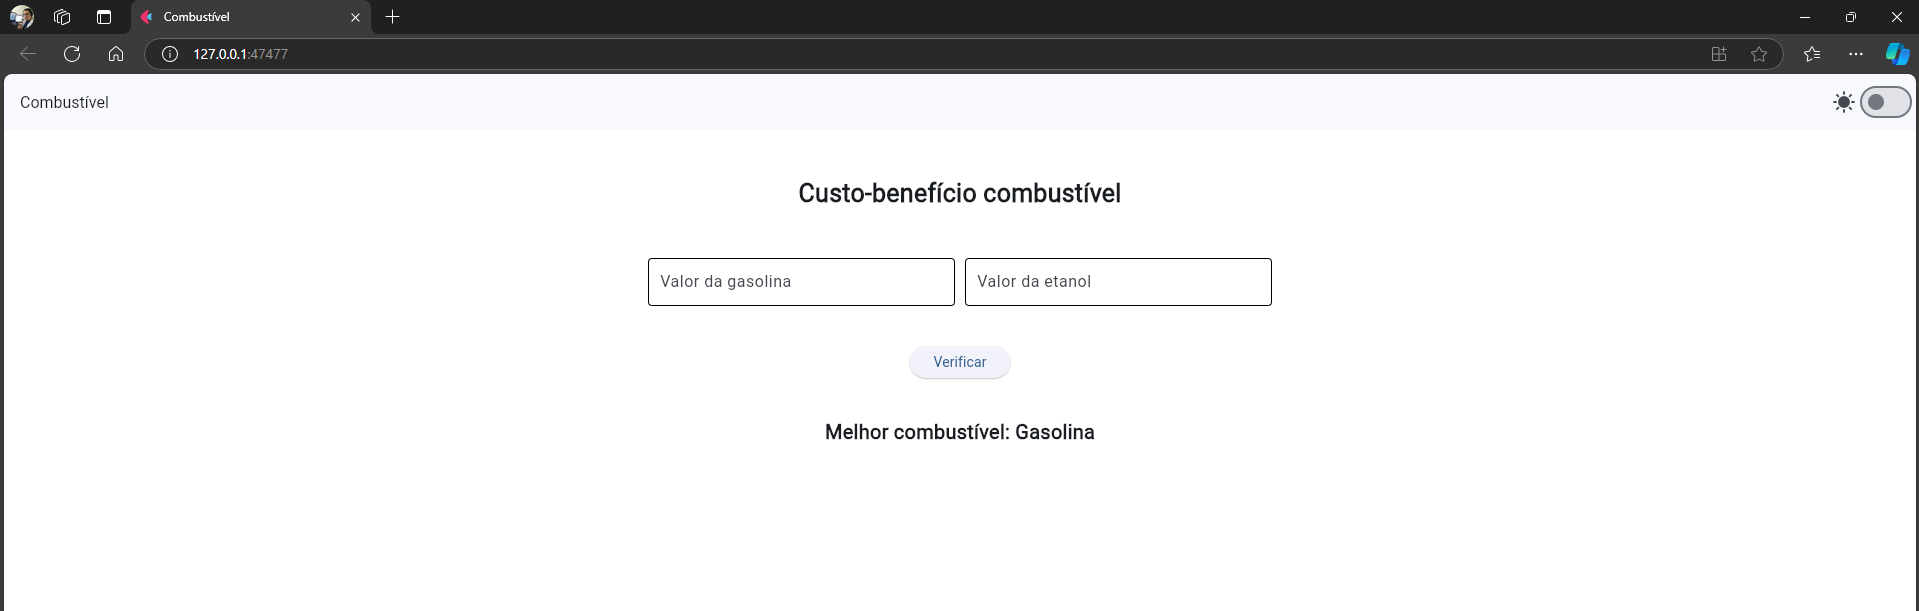

#### Mobile

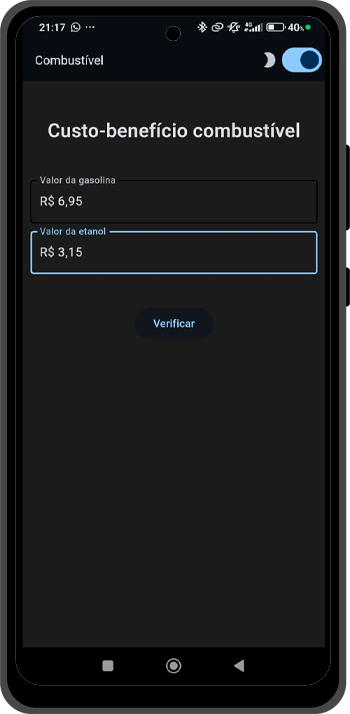
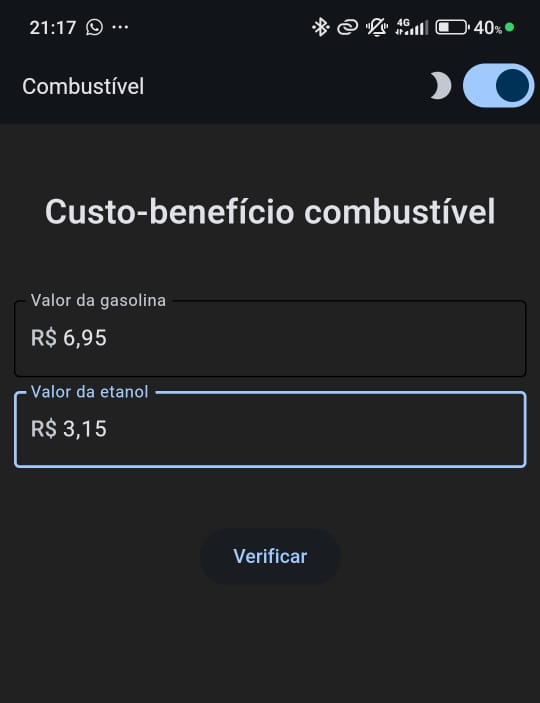

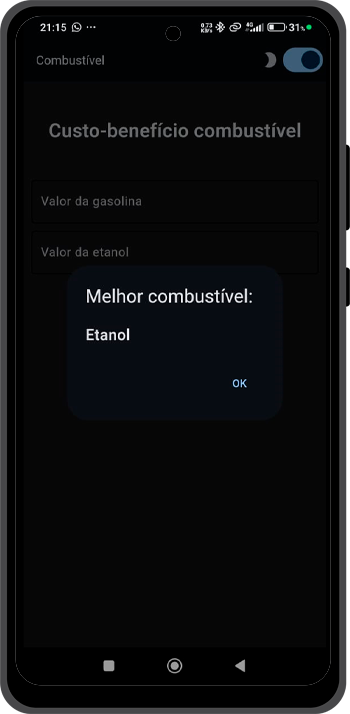
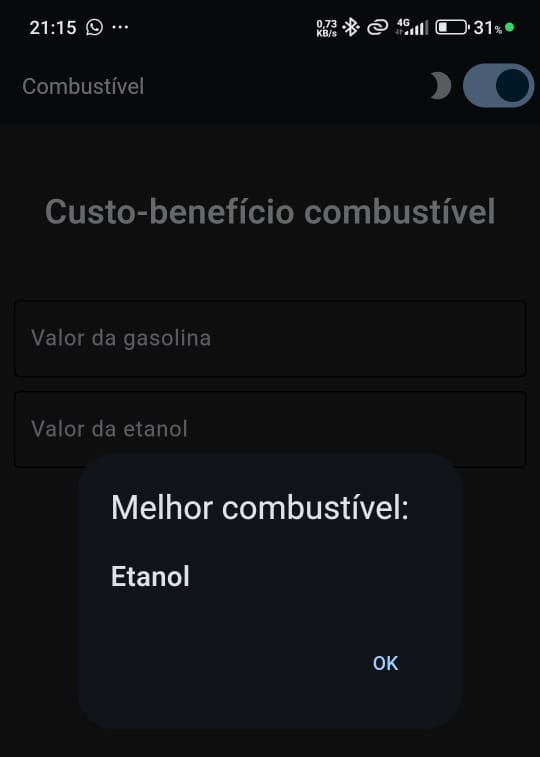
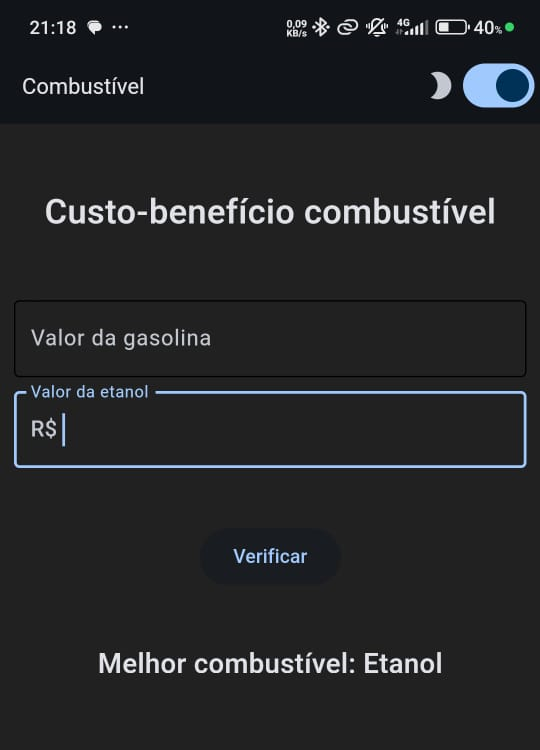

#### Mensagens de erro

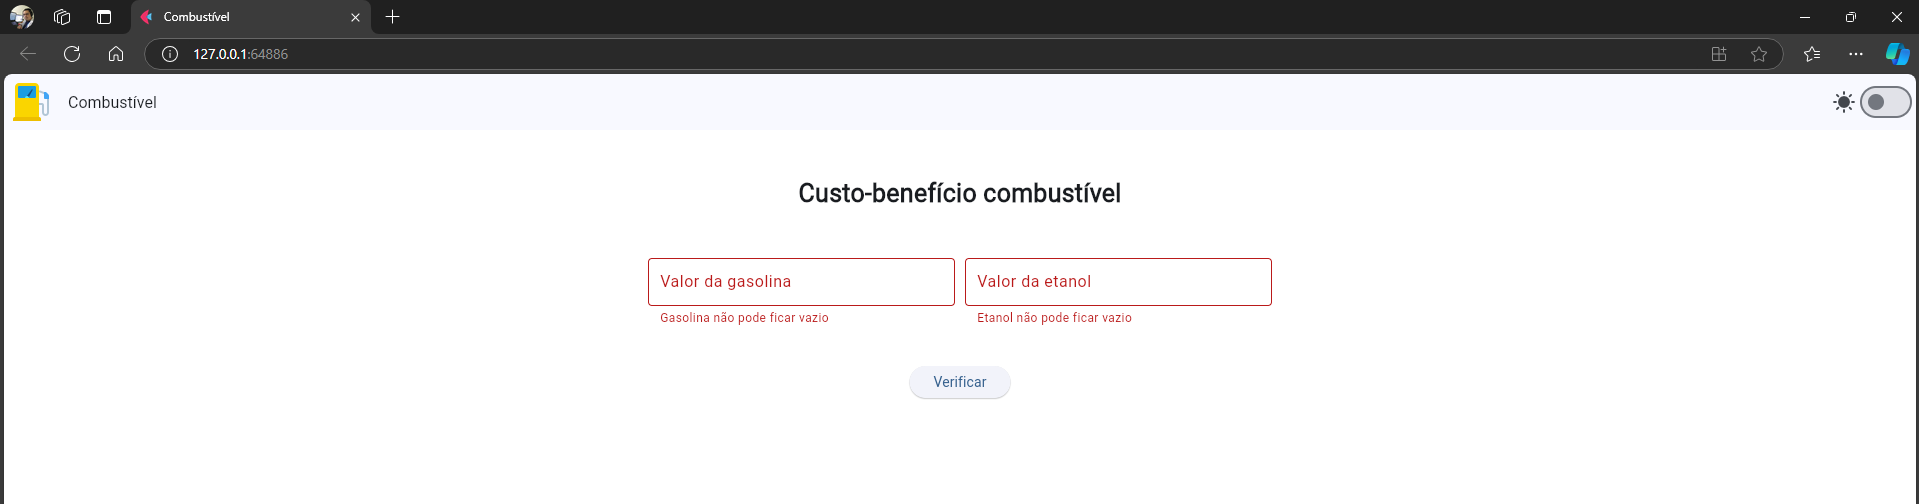
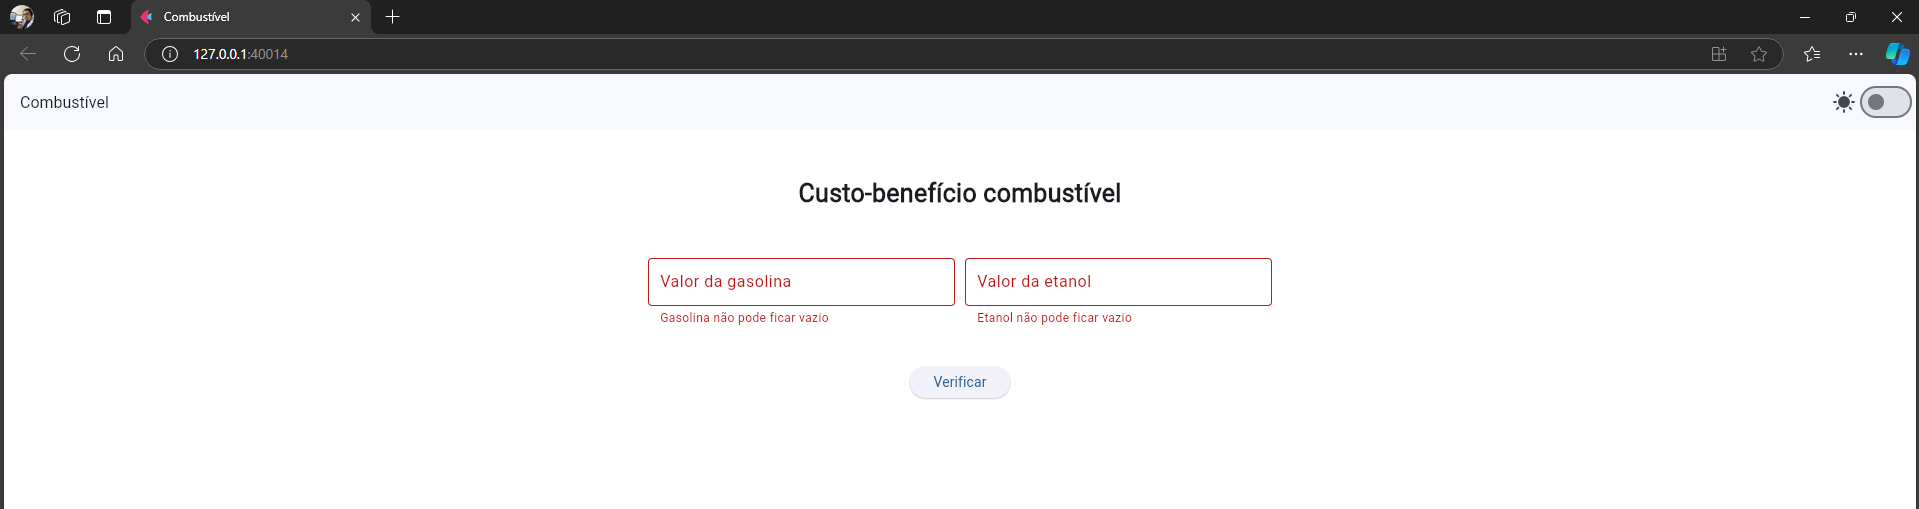

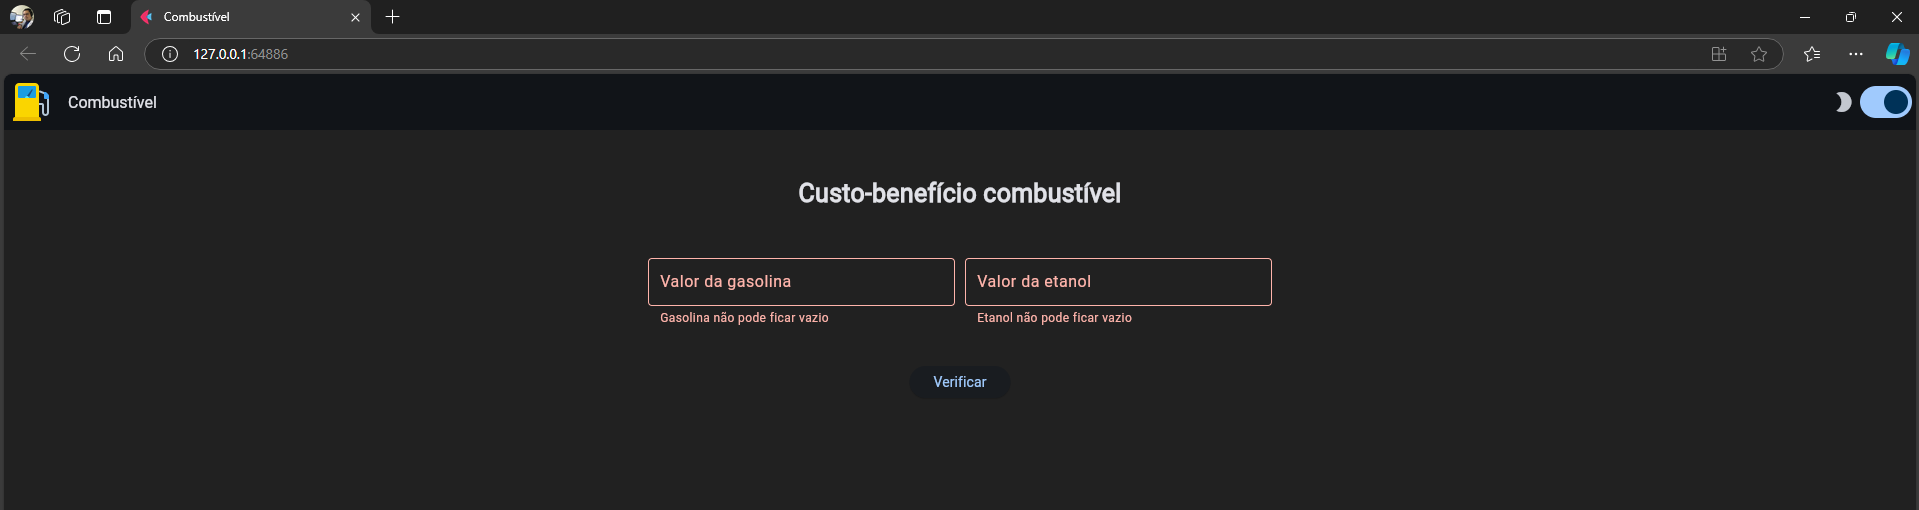